In [1]:
data(ruspini, package="cluster")

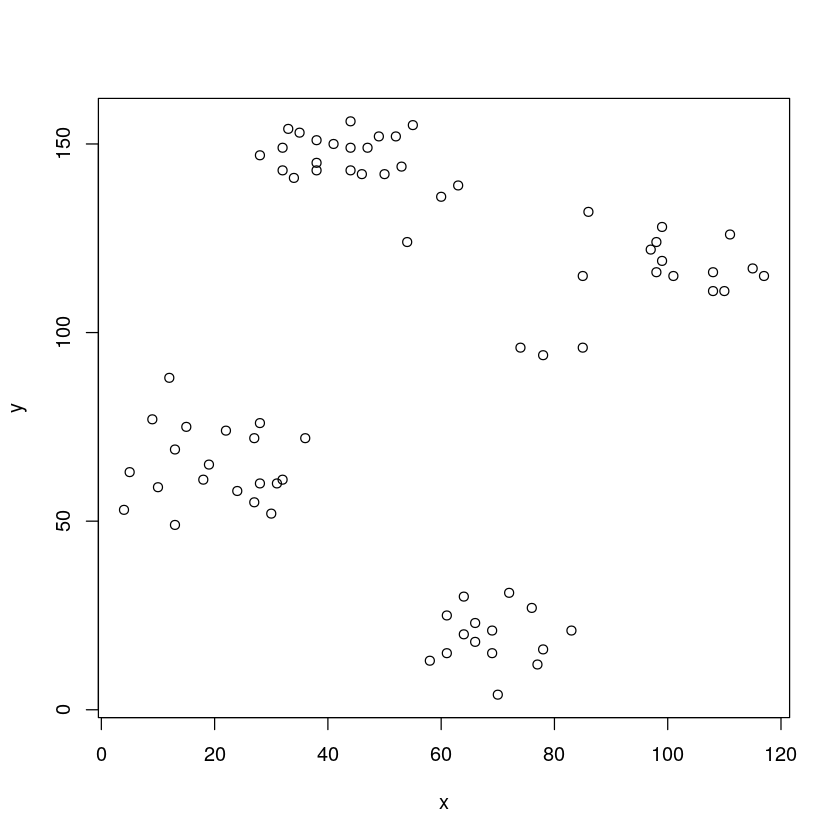

In [2]:
ruspini <- ruspini[sample(1:nrow(ruspini)),]
plot(ruspini)

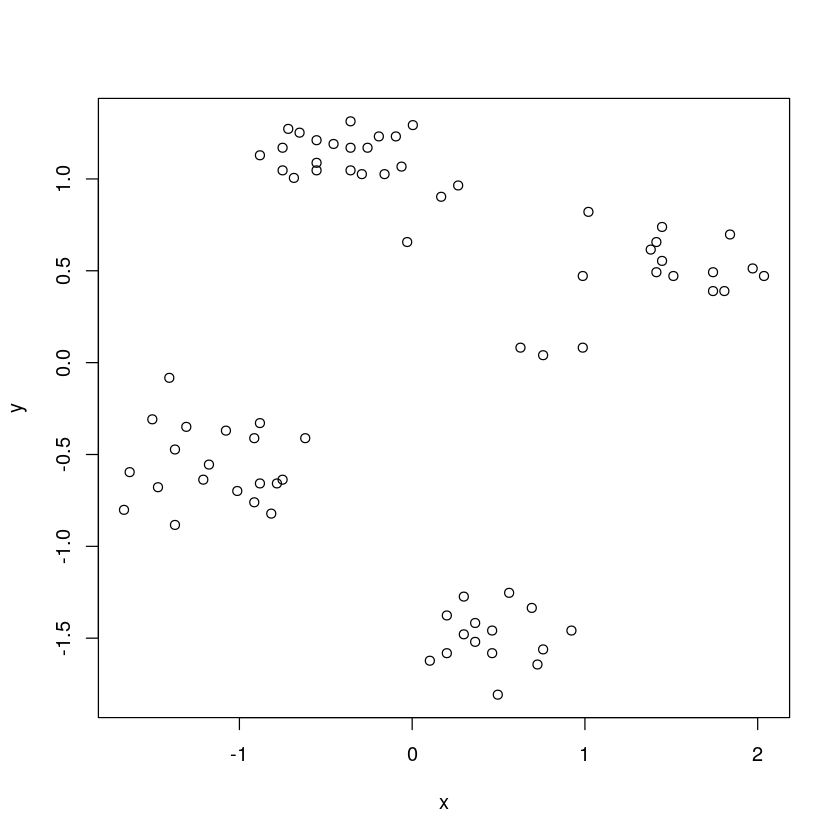

In [3]:
ruspini_scaled <- scale(ruspini)
plot(ruspini_scaled)

In [4]:
km <- kmeans(ruspini_scaled, centers=4, nstart=10)
km

K-means clustering with 4 clusters of sizes 17, 15, 23, 20

Cluster means:
           x          y
1  1.4194387  0.4692907
2  0.4607268 -1.4912271
3 -0.3595425  1.1091151
4 -1.1385941 -0.5559591

Clustering vector:
15 31 12 40 27 75  3 53  9 45 16 36 24 21 11 66  5 71  8 58 13 26  7 47 48 34 
 4  3  4  3  3  2  4  1  4  1  4  3  3  3  4  2  4  2  4  1  4  3  4  1  1  3 
64 22 62 46 32  6 49 70 35 52 17 23 54 42 74 28 60 55 68 51 33 61 43 18 39  1 
 2  3  2  1  3  4  1  2  3  1  4  3  1  3  2  3  1  1  2  1  3  2  3  4  3  4 
 4 63  2 25 20 57 59 19 67 38 72 65 30 29 50 73 10 41 44 56 37 14 69 
 4  2  4  3  4  1  1  4  2  3  2  2  3  3  1  2  4  3  1  1  3  4  2 

Within cluster sum of squares by cluster:
[1] 3.641276 1.082373 2.658679 2.705477
 (between_SS / total_SS =  93.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

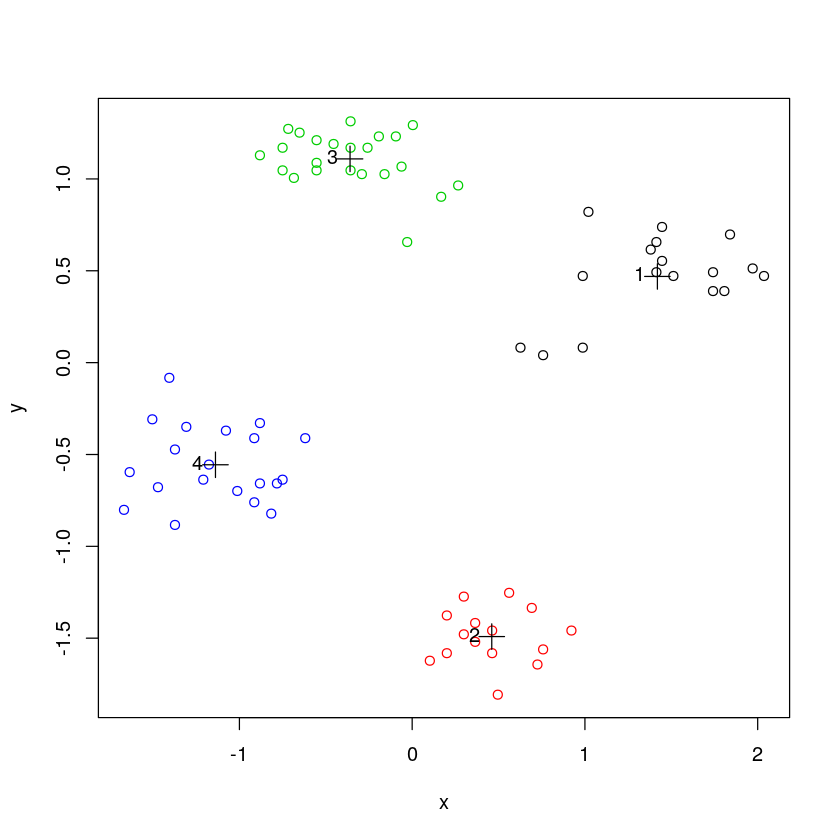

In [5]:
plot(ruspini_scaled, col=km$cluster)
points(km$centers, pch=3, cex=2) # this adds the centroids
text(km$centers, labels=1:4, pos=2) # this adds the cluster ID

In [6]:
library(cluster)


Attaching package: ‘cluster’


The following object is masked _by_ ‘.GlobalEnv’:

    ruspini




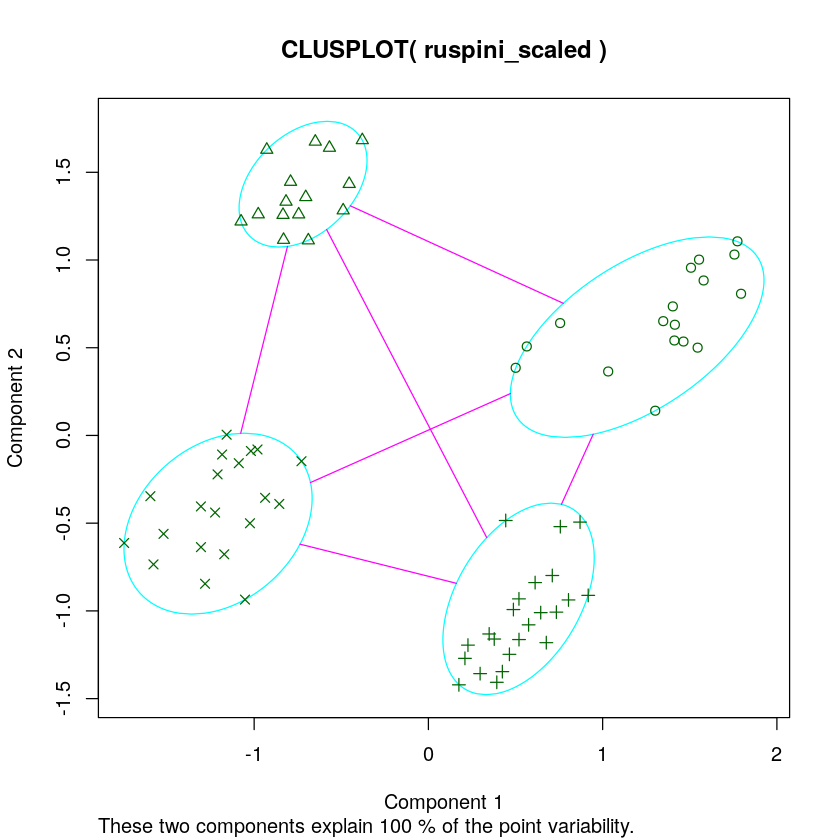

In [7]:
clusplot(ruspini_scaled, km$cluster)

In [8]:
km$centers

,x,y
1,1.4194387,0.4692907
2,0.4607268,-1.4912271
3,-0.3595425,1.1091151
4,-1.1385941,-0.5559591


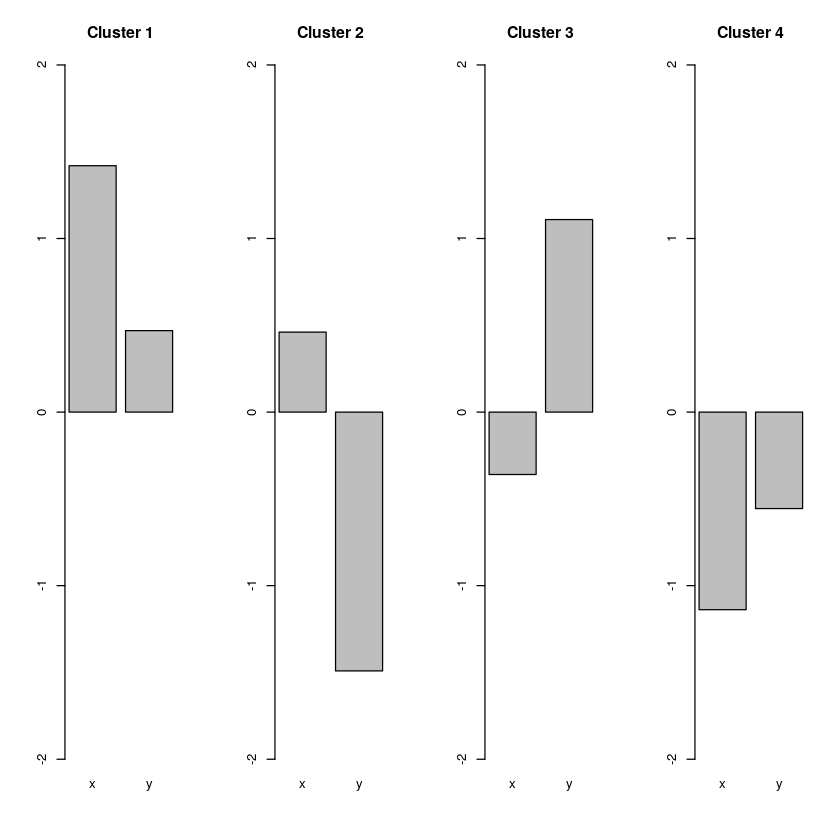

In [9]:
def.par <- par(no.readonly = TRUE) # save default, for resetting...
layout(t(1:4)) # 4 plots in one
for(i in 1:4) barplot(km$centers[i,], ylim=c(-2,2), main=paste("Cluster", i))

In [10]:
par(def.par)  #- reset to default

In [11]:
cluster1 <- ruspini_scaled[km$cluster==1,]
head(cluster1)

,x,y
53,1.4464374,0.73863240
45,0.9874591,0.47170631
58,1.8398474,0.69756685
47,0.7579699,0.04051801
48,0.6268333,0.08158356
46,0.9874591,0.08158356


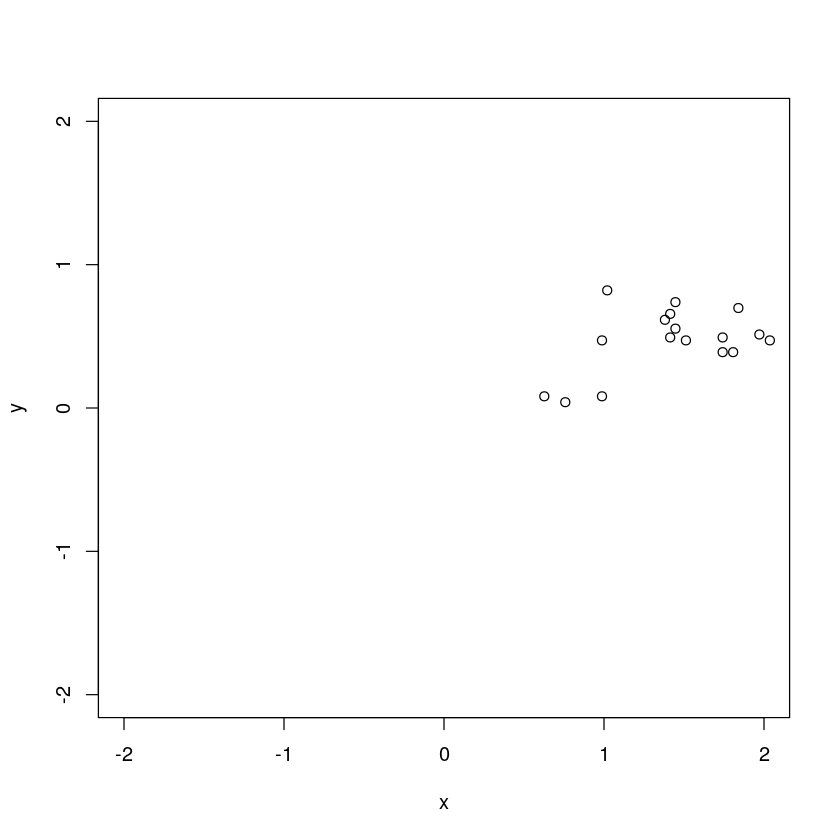

In [12]:
plot(cluster1, xlim = c(-2,2), ylim = c(-2,2))

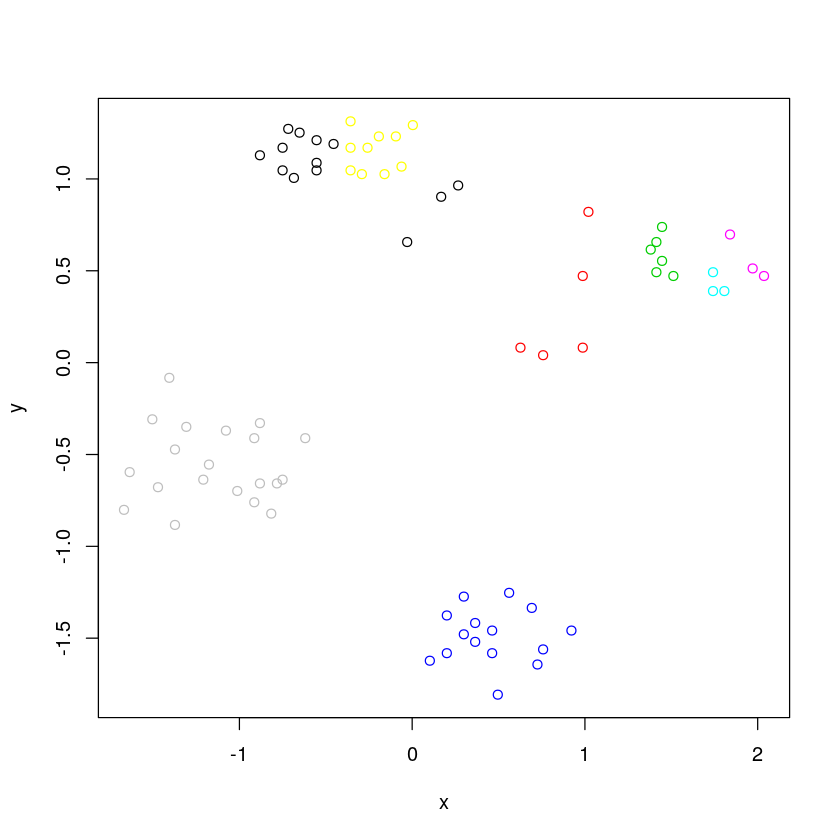

In [13]:
plot(ruspini_scaled, col=kmeans(ruspini_scaled, centers=10)$cluster)

In [14]:
d <- dist(ruspini_scaled)

In [15]:
hc <- hclust(d, method="complete")

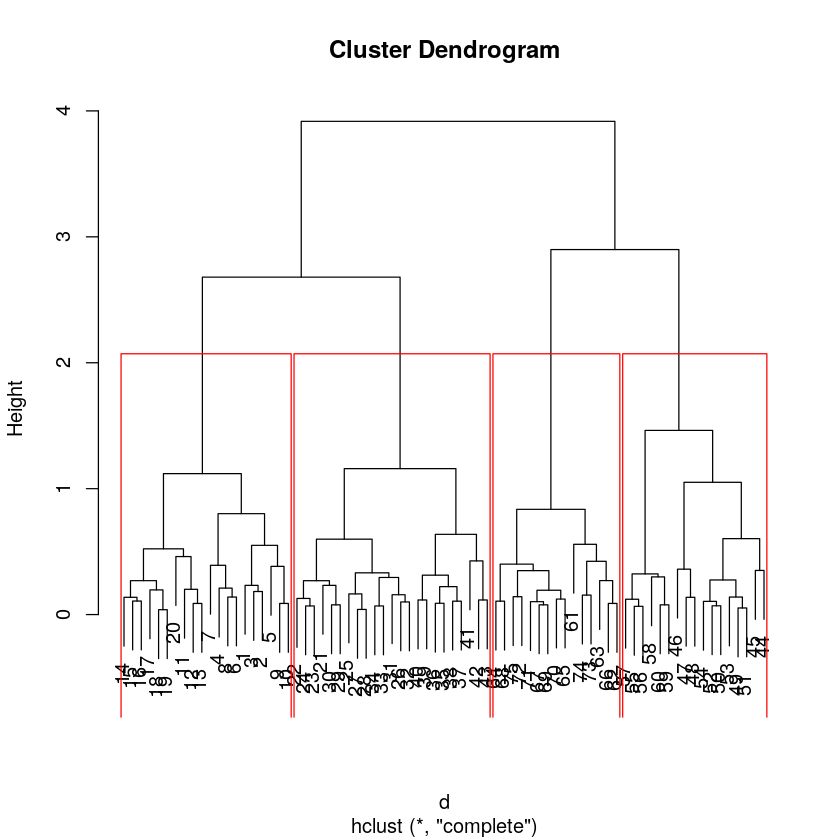

In [16]:
plot(hc)
rect.hclust(hc, k=4)

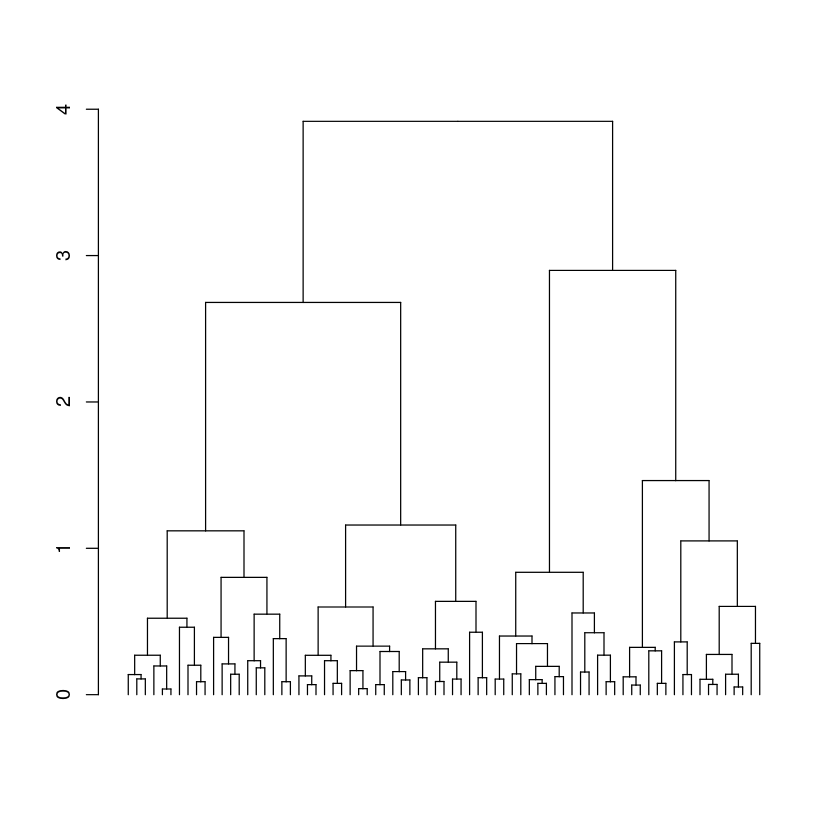

In [17]:
plot(as.dendrogram(hc), leaflab="none") # plot dendrogram without leaf labels

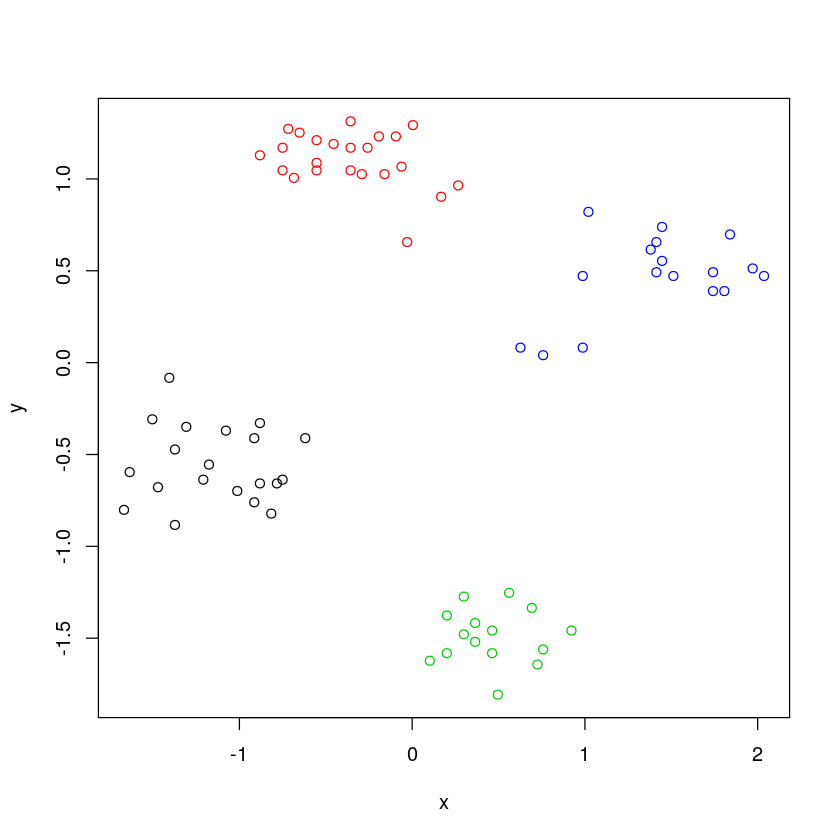

In [18]:
cluster_complete <- cutree(hc, k=4)
plot(ruspini_scaled, col=cluster_complete)

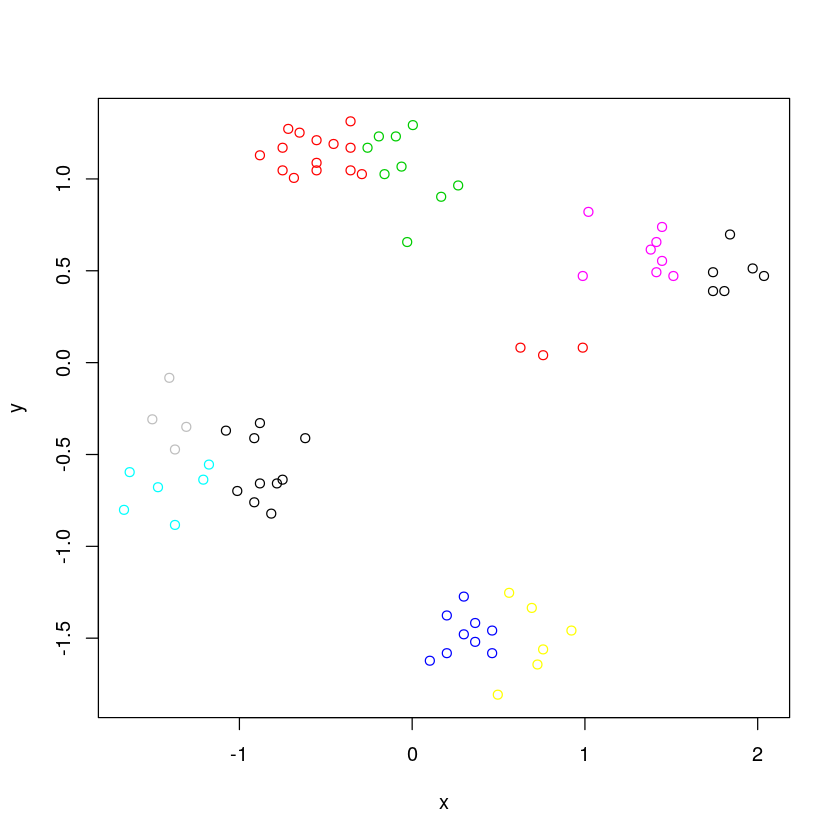

In [19]:
plot(ruspini_scaled, col=cutree(hc, k=10))

In [20]:
library(dbscan)

In [21]:
db <- dbscan(ruspini_scaled, eps=.25, minPts=3)
db
str(db)

DBSCAN clustering for 75 objects.
Parameters: eps = 0.25, minPts = 3
The clustering contains 5 cluster(s) and 6 noise points.

 0  1  2  3  4  5 
 6 19 20 15 12  3 

Available fields: cluster, eps, minPts

List of 3
 $ cluster: int [1:75] 1 2 1 2 2 3 1 4 1 0 ...
 $ eps    : num 0.25
 $ minPts : num 3
 - attr(*, "class")= chr [1:2] "dbscan_fast" "dbscan"


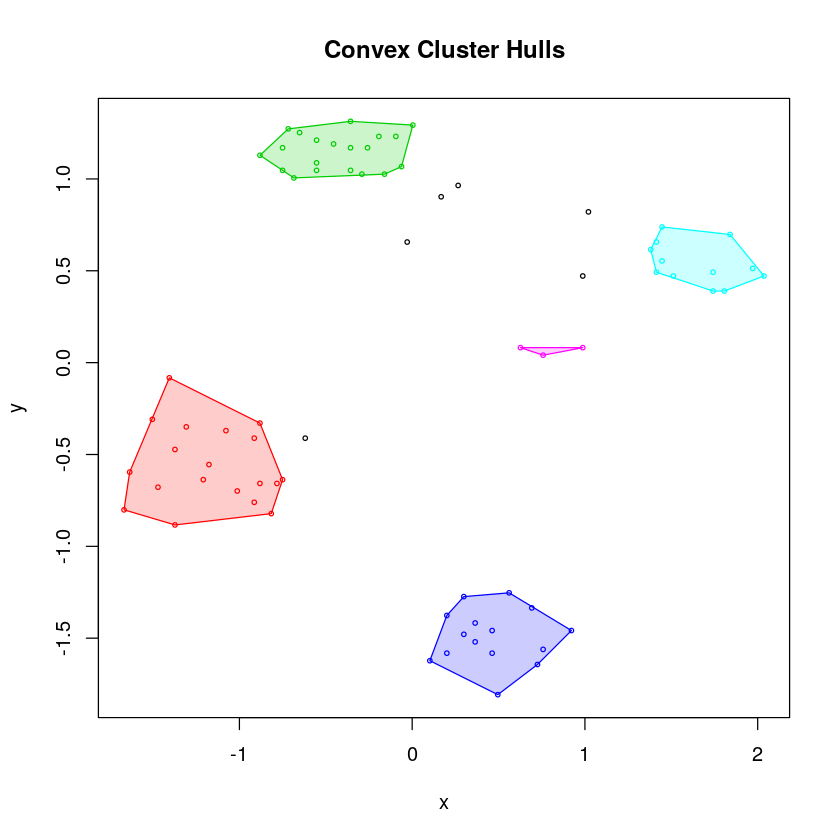

In [22]:
hullplot(ruspini_scaled, db)

In [23]:
library(mclust)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEI (diagonal, equal volume and shape) model with 5 components: 

 log-likelihood  n df       BIC       ICL
      -91.26485 75 16 -251.6095 -251.7486

Clustering table:
 1  2  3  4  5 
20 23 15 14  3 

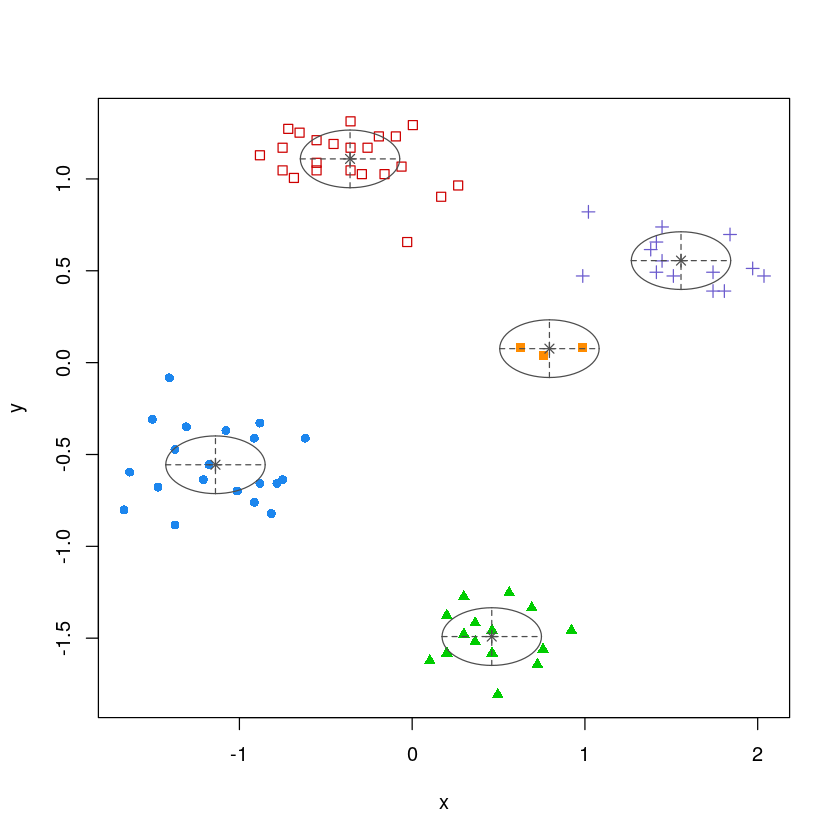

In [24]:
m <- Mclust(ruspini_scaled)
summary(m)
plot(m, what = "classification")

In [25]:
m <- Mclust(ruspini_scaled, G=4)
summary(m)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEI (diagonal, equal volume and shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -101.6027 75 13 -259.3327 -259.3356

Clustering table:
 1  2  3  4 
20 23 15 17 

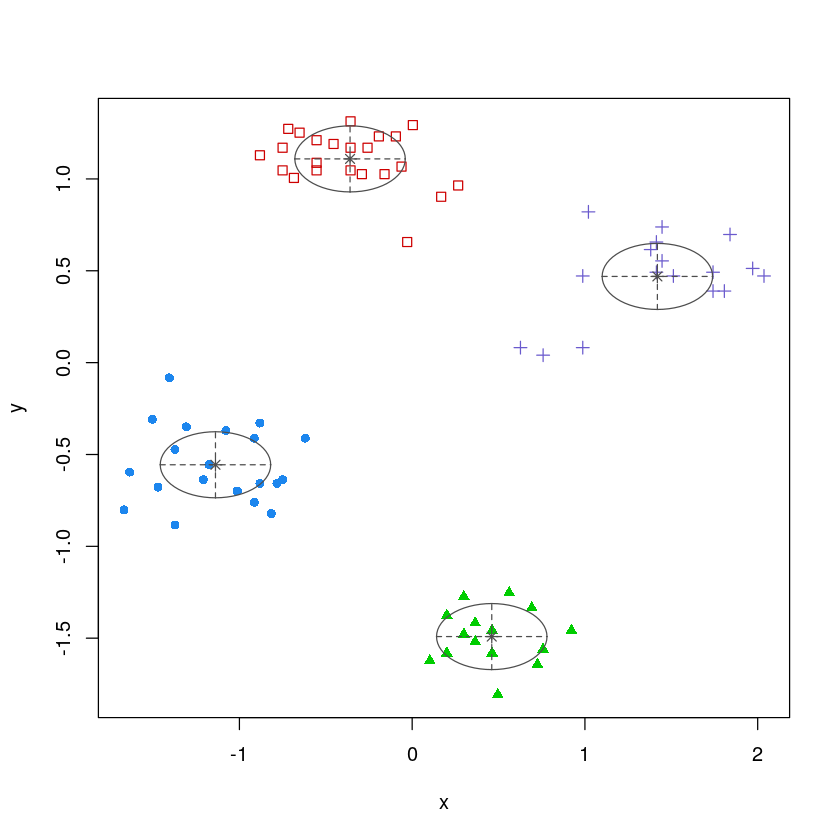

In [26]:
plot(m, what = "classification")